In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\Jesse\Documents\GitHub\jesse-anderson.github.io\Blog\posts\OPTICSinPython':
  os.chdir(r'C:\Users\Jesse\Documents\GitHub\jesse-anderson.github.io\Blog\posts\OPTICSinPython')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"C:\\Program Files\\Python312\\Lib\\importlib\\_bootstrap.py": 1712692218.0, "C:\\Program Files\\Python312\\Lib\\importlib\\_bootstrap_external.py": 1712692218.0, "C:\\Program Files\\Python312\\Lib\\zipimport.py": 1712692218.0, "C:\\Program Files\\Python312\\Lib\\codecs.py": 1712692218.0, "C:\\Program Files\\Python312\\Lib\\encodings\\aliases.py": 1712692218.0, "C:\\Program Files\\Python312\\Lib\\encodings\\__init__.py": 1712692218.0, "C:\\Program Files\\Python312\\Lib\\encodings\\utf_8.py": 1712692218.0, "C:\\Program Files\\Python312\\Lib\\encodings\\cp1252.py": 1712692218.0, "C:\\Program Files\\Python312\\Lib\\abc.py": 1712692218.0, "C:\\Program Files\\Python312\\Lib\\io.py": 1712692218.0, "C:\\Program Files\\Python312\\Lib\\stat.py": 1712692218.0, "C:\\Program Files\\Python312\\Lib\\_collections_abc.py": 1712692218.0, "C:\\Program Files\\Python312\\Lib\\genericpath.py": 1712692218.0, "C:\\Program Files\\Python312\\Lib\\ntpath.py": 1712692218.0, "C:\\Program Files\\Python312\\Lib\\o

C:\Users\Jesse\AppData\Local\Temp\ipykernel_359868\2529136635.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn import datasets
from kneed import KneeLocator
from matplotlib.patches import Polygon
import matplotlib.colors as mcolors
from scipy.spatial import ConvexHull

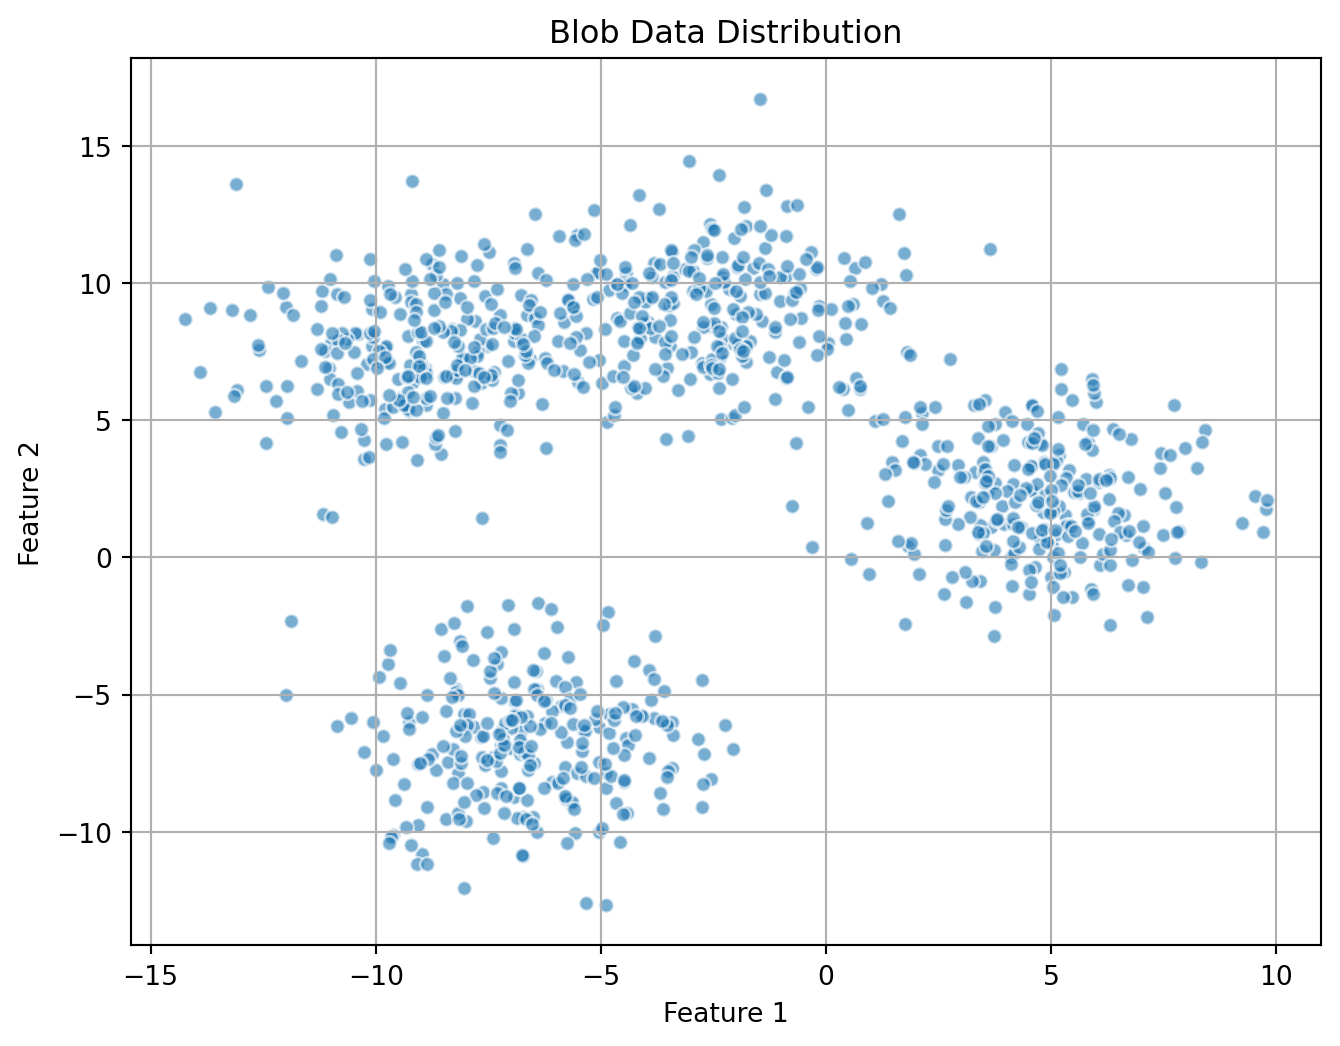

In [3]:
# Load example data
n_samples = 1000
min_samples = 15
data, _ = datasets.make_blobs(n_samples=n_samples, centers=4, random_state=42, cluster_std=2.0)

# Plot the original data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, edgecolors='w', s=30)
plt.title('Blob Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [4]:
# Step 1: Apply OPTICS
optics_model = OPTICS(min_samples=min_samples)
optics_model.fit(data)

OPTICS(min_samples=15)

Infinity values found in reachability distances, handling...


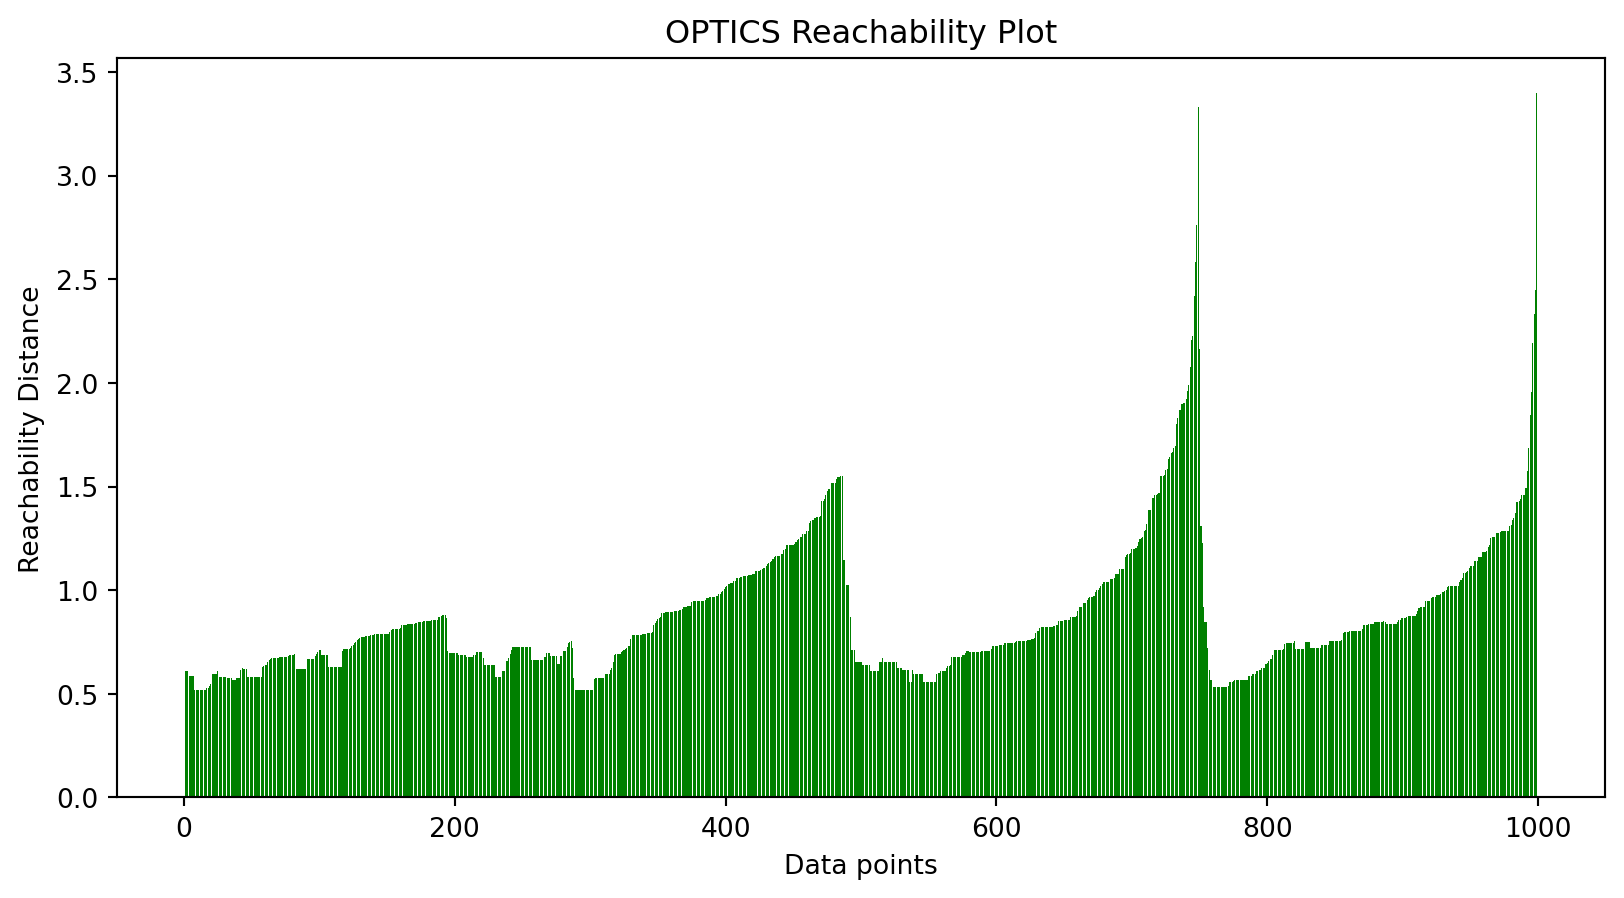

In [5]:
# Step 2: Plot the reachability diagram
space = np.arange(len(data))
reachability = optics_model.reachability_[optics_model.ordering_]

# Check for infinity values in reachability distances
if np.isinf(reachability).any():
    print("Infinity values found in reachability distances, handling...")
    # Identify finite indices where reachability values are not infinity
    finite_indices = np.isfinite(reachability)

    # Filter out infinite reachability values and their corresponding indices
    reachability = reachability[finite_indices]
    space = space[finite_indices]

plt.figure(figsize=(10, 5))
plt.bar(space, reachability, color='g')
plt.title('OPTICS Reachability Plot')
plt.xlabel('Data points')
plt.ylabel('Reachability Distance')
plt.show()

In [6]:
# Plot sorted reachability distances
sorted_reachability = np.sort(reachability)
indices = np.arange(len(sorted_reachability))
# plt.figure(figsize=(10, 5))
# plt.plot(indices, sorted_reachability, label='Reachability Distance')

# Compute the line endpoints based on the first and last reachability distance
line_start = np.array([0, sorted_reachability[0]])
line_end = np.array([len(sorted_reachability) - 1, sorted_reachability[-1]])

# Calculate the slope and intercept of the line (y = mx + b)
slope = (line_end[1] - line_start[1]) / (line_end[0] - line_start[0])
intercept = line_start[1] - (slope * line_start[0])

# Calculate the y-values of the line across all x-values
line_y = (slope * indices) + intercept

# Plot the line
# plt.plot(indices, line_y, 'r--', label='Line from first to last index')

# Find the elbow index (maximum deviation point)
deviations = np.abs(sorted_reachability - line_y)
elbow_index = np.argmax(deviations)

elbow_cutoff = sorted_reachability[elbow_index]


# Mark the elbow point
# plt.axvline(x=elbow_index, color='b', linestyle='--', label=f'Elbow Point at index {elbow_index} = {elbow_cutoff}')
# plt.axhline(y = elbow_cutoff, color = 'k', linestyle = ':', label = 'Cutoff for reachability distance.')
# plt.title('Sorted Reachability Distances with Maximum Deviation Line')
# plt.xlabel('Data points (sorted)')
# plt.ylabel('Reachability Distance')
# plt.legend()
# plt.show()

In [7]:
#  Create a list of colors to use for bars below the threshold, and black for above
# We'll generate a color map to cycle through a set of colors for segments below the threshold
below_threshold_colors = list(mcolors.TABLEAU_COLORS.values())  # Get a set of unique colors
color_index = 0
current_color = below_threshold_colors[color_index]
colors = []

# Track whether the previous bar was below the threshold
previous_bar_below = False

# Assign colors to bars based on their height relative to the threshold
for val in reachability:
    if val <= elbow_cutoff:
        # If we're transitioning from above to below the threshold, change the color
        if not previous_bar_below:
            color_index = (color_index + 1) % len(below_threshold_colors)
            current_color = below_threshold_colors[color_index]
        colors.append(current_color)
        previous_bar_below = True
    else:
        colors.append('k')  # Black for bars above the threshold
        previous_bar_below = False

# Now, let's create the reachability plot with custom bar colors
# plt.figure(figsize=(10, 5))
# plt.axhline(y=elbow_cutoff, color='k', linestyle=':', label='Cutoff for reachability distance.')
# plt.bar(space, reachability, color=colors)
# plt.title('OPTICS Reachability Plot')
# plt.xlabel('Data points')
# plt.ylabel('Reachability Distance')
# plt.legend()
# plt.show()

In [8]:
# Step 3: Extract clusters using the reachability distance at the elbow point as a cutoff
# The reachability distance at the elbow is used as a threshold for cluster extraction
reachability_distance_at_elbow = elbow_cutoff

# Retrieve the ordered reachability distances from the OPTICS model
ordered_reachability = optics_model.reachability_[optics_model.ordering_]
ordered_indices = optics_model.ordering_

# Initialize all points as noise (-1)
labels = np.full(ordered_reachability.shape, -1)  

# Manually assign clusters based on the new threshold, apparently OPTICS.expand_clusters or similar doesn't work anymore so here we are...
cluster_id = 0
for i in range(len(ordered_reachability)):
    if ordered_reachability[i] <= reachability_distance_at_elbow:
        if labels[ordered_indices[i]] == -1:  # If this point has not been assigned a cluster
            # Start a new cluster from this point
            labels[ordered_indices[i]] = cluster_id
            # Add all directly reachable points to the same cluster
            for j in range(i + 1, len(ordered_reachability)):
                if ordered_reachability[j] <= reachability_distance_at_elbow:
                    labels[ordered_indices[j]] = cluster_id
                else:
                    break
            cluster_id += 1

# Step 4: Plot the clusters based on the new manually set labels
# plt.figure(figsize=(10, 7))
unique_labels = set(labels)

# Generate colors for each cluster label
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# for klass, color in zip(unique_labels, colors):
#     class_member_mask = (labels == klass)
#     xy = data[class_member_mask]
#     if klass != -1:
#         # Draw the convex hull and fill it with a light shade of the cluster color
#         if xy.shape[0] > 2:  # ConvexHull needs at least 3 points to compute the hull
#             hull = ConvexHull(xy)
#             plt.fill(xy[hull.vertices, 0], xy[hull.vertices, 1], color=color, alpha=0.2, edgecolor='k')
#         plt.scatter(xy[:, 0], xy[:, 1], color=color, edgecolor='k', label=f'Cluster {klass}')
#     else:
#         plt.scatter(xy[:, 0], xy[:, 1], c='k', marker='x', label='Noise')

# plt.title('Clusters by OPTICS with Manual Threshold and Hulls')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.show()

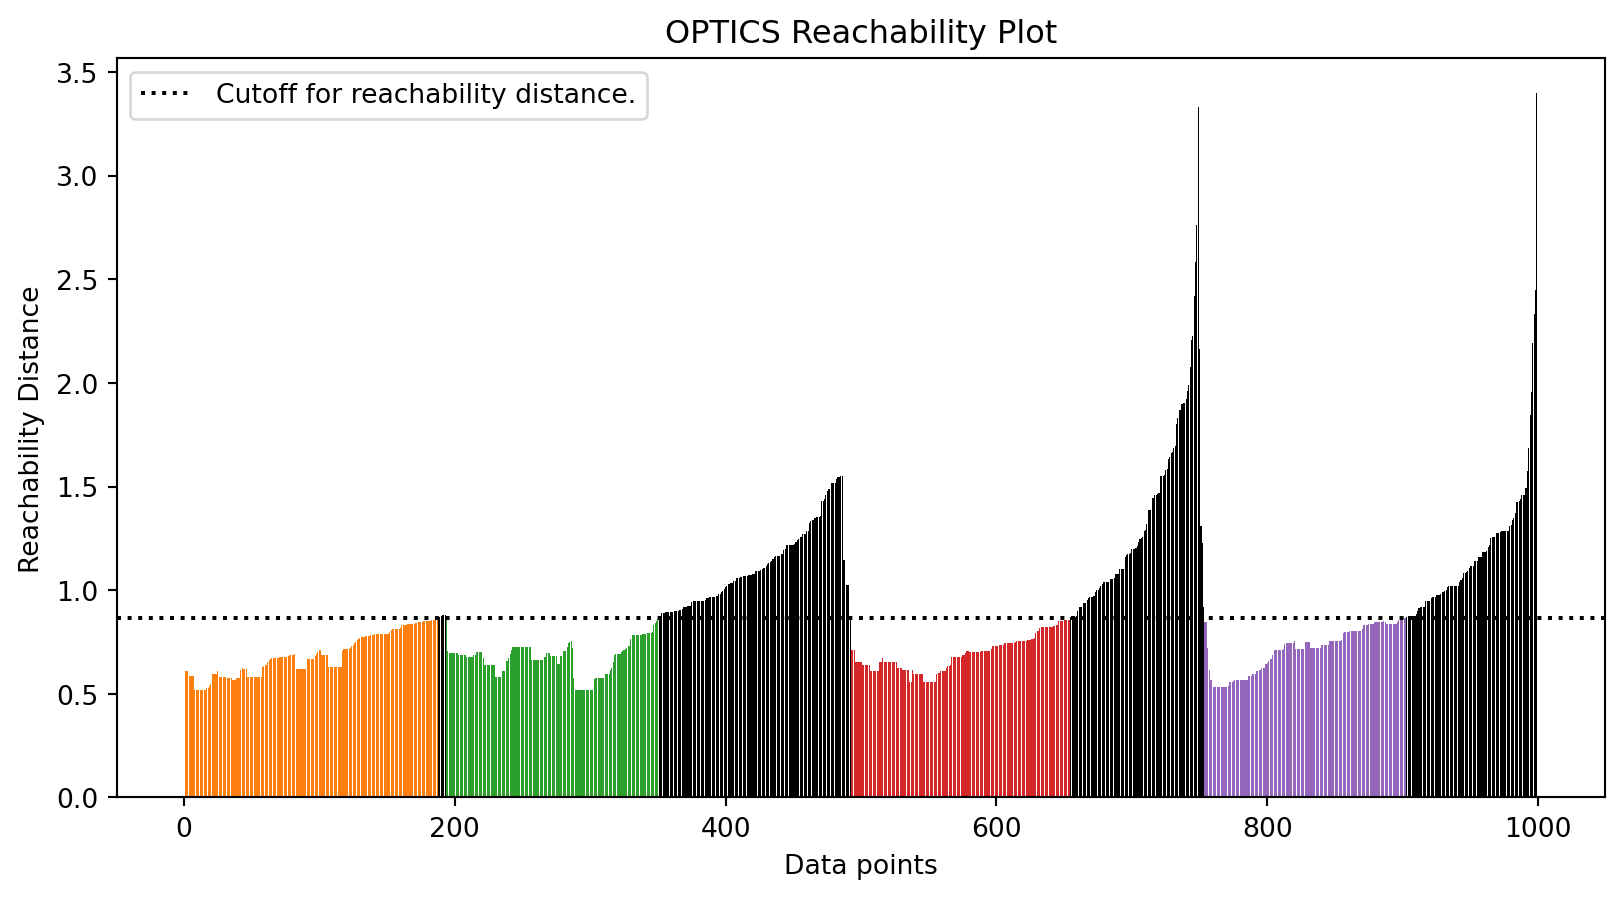

In [9]:
elbow_cutoff =0.866 ##THIS IS A GREAT EXAMPLE OF WHEN YOUR ELBOW FAILS YOU AND YOU NEED TO PLAY AROUND WITH VALUES!!!!

#  Create a list of colors to use for bars below the threshold, and black for above
# We'll generate a color map to cycle through a set of colors for segments below the threshold
below_threshold_colors = list(mcolors.TABLEAU_COLORS.values())  # Get a set of unique colors
color_index = 0
current_color = below_threshold_colors[color_index]
colors = []

# Track whether the previous bar was below the threshold
previous_bar_below = False

# Assign colors to bars based on their height relative to the threshold
for val in reachability:
    if val <= elbow_cutoff:
        # If we're transitioning from above to below the threshold, change the color
        if not previous_bar_below:
            color_index = (color_index + 1) % len(below_threshold_colors)
            current_color = below_threshold_colors[color_index]
        colors.append(current_color)
        previous_bar_below = True
    else:
        colors.append('k')  # Black for bars above the threshold
        previous_bar_below = False

# Now, let's create the reachability plot with custom bar colors
plt.figure(figsize=(10, 5))
plt.axhline(y=elbow_cutoff, color='k', linestyle=':', label='Cutoff for reachability distance.')
plt.bar(space, reachability, color=colors)
plt.title('OPTICS Reachability Plot')
plt.xlabel('Data points')
plt.ylabel('Reachability Distance')
plt.legend()
plt.show()

In [10]:
# Step 3: Extract clusters using the reachability distance at the elbow point as a cutoff
# The reachability distance at the elbow is used as a threshold for cluster extraction
reachability_distance_at_elbow = elbow_cutoff

# Retrieve the ordered reachability distances from the OPTICS model
ordered_reachability = optics_model.reachability_[optics_model.ordering_]
ordered_indices = optics_model.ordering_

# Initialize all points as noise (-1)
labels = np.full(ordered_reachability.shape, -1)  

# Manually assign clusters based on the new threshold, apparently OPTICS.expand_clusters or similar doesn't work anymore so here we are...
cluster_id = 0
for i in range(len(ordered_reachability)):
    if ordered_reachability[i] <= reachability_distance_at_elbow:
        if labels[ordered_indices[i]] == -1:  # If this point has not been assigned a cluster
            # Start a new cluster from this point
            labels[ordered_indices[i]] = cluster_id
            # Add all directly reachable points to the same cluster
            for j in range(i + 1, len(ordered_reachability)):
                if ordered_reachability[j] <= reachability_distance_at_elbow:
                    labels[ordered_indices[j]] = cluster_id
                else:
                    break
            cluster_id += 1

# Step 4: Plot the clusters based on the new manually set labels
# plt.figure(figsize=(10, 7))
unique_labels = set(labels)

# Generate colors for each cluster label
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# for klass, color in zip(unique_labels, colors):
#     class_member_mask = (labels == klass)
#     xy = data[class_member_mask]
#     if klass != -1:
#         # Draw the convex hull and fill it with a light shade of the cluster color
#         if xy.shape[0] > 2:  # ConvexHull needs at least 3 points to compute the hull
#             hull = ConvexHull(xy)
#             plt.fill(xy[hull.vertices, 0], xy[hull.vertices, 1], color=color, alpha=0.2, edgecolor='k')
#         plt.scatter(xy[:, 0], xy[:, 1], color=color, edgecolor='k', label=f'Cluster {klass}')
#     else:
#         plt.scatter(xy[:, 0], xy[:, 1], c='k', marker='x', label='Noise')

# plt.title('Clusters by OPTICS with Manual Threshold and Hulls')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.show()

In [11]:
#Now instead of using the reachability metric we use the Xi clustering method to apply OPTICS
#Please note I tried relative differences in reachability distances by calculating their relative slopes and another method using significant slopes
# using a percentile approach and they both performed poor.
from sklearn.metrics import silhouette_score
from joblib import Parallel, delayed #I have 16 cores and I will use 16 cores....
# Initial OPTICS model to get reachability distances
optics_model_initial = OPTICS(min_samples=min_samples)
optics_model_initial.fit(data)
reachabilities_initial = optics_model_initial.reachability_[optics_model_initial.ordering_]

# Calculate differences in reachability distances
reachability_diffs = np.diff(reachabilities_initial)
reachability_diffs = reachability_diffs[np.isfinite(reachability_diffs)]  # Remove any infinite or NaN values

# Validate differences before calculating statistics
if len(reachability_diffs) > 0:
    mean_diff = np.mean(reachability_diffs)
    std_diff = np.std(reachability_diffs)
    xi_value = max(0.0, min(mean_diff + std_diff, 1.0))  # Ensure Xi is within [0.0, 1.0] and not NaN
else:
    xi_value = 0.05  # Fallback value if differences calculation fails
print("Xi Value[Differences]:", xi_value)

# Calculate relative slopes (normalized by preceding reachability value)
slopes = np.diff(reachabilities_initial) / reachabilities_initial[:-1]
# print(slopes)
# Handle any NaN or infinity from division by very small numbers
slopes = np.nan_to_num(slopes)

# Determine significant slopes using a percentile approach
significant_slope_threshold = np.percentile(np.abs(slopes), 96)
print(significant_slope_threshold)
# Use this threshold to set Xi
xi_value = significant_slope_threshold
print("Xi_value[Significanty Slopes]: ", xi_value)



#Rewrite Me

# Define a function that computes the silhouette score for a given Xi
def compute_silhouette(xi, data, min_samples):
    model = OPTICS(min_samples=min_samples, xi=xi, cluster_method='xi')
    model.fit(data)
    labels = model.labels_
    if len(set(labels)) > 1 and np.any(labels != -1):
        return silhouette_score(data, labels)
    else:
        return -1  # Return a penalty for bad clustering
    
# Trying a range of potential Xi values to find the best based on silhouette score
xi_values = np.linspace(0.01, 1, 1000)  # Testing Xi values from 0.01 to 0.1

#Note this can take some time to calculate...
silhouette_scores = []
#Silhouette score is a metric used to evaluate the quality of clustering.Aim for highest silhouette score.

# Use joblib to parallelize the computation of silhouette scores. Update article.
silhouette_scores = Parallel(n_jobs=-1)(delayed(compute_silhouette)(xi, data, min_samples) for xi in xi_values)

# Plot the silhouette scores for different Xi values
# plt.figure(figsize=(10, 5))
# plt.plot(xi_values, silhouette_scores, marker='o')
# plt.title('Silhouette Scores for Different Xi Values')
# plt.xlabel('Xi Value')
# plt.ylabel('Silhouette Score')
# plt.grid(True)
# plt.show()

Xi Value[Differences]: 0.06738467759335512
0.06486873356523164
Xi_value[Significanty Slopes]:  0.06486873356523164


C:\Users\Jesse\AppData\Local\Temp\ipykernel_359868\2141299887.py:25: RuntimeWarning: invalid value encountered in divide
  slopes = np.diff(reachabilities_initial) / reachabilities_initial[:-1]


In [12]:
# Select the best Xi based on maximum silhouette score
best_xi_index = np.argmax(silhouette_scores)
best_xi = xi_values[best_xi_index]
xi_value = best_xi
print("Xi Value[Silhouette Score Iterative]", xi_value)
# Apply OPTICS using dynamically determined xi clustering method
optics_model = OPTICS(min_samples=min_samples, xi=xi_value, cluster_method='xi')
optics_model.fit(data)

# Extract the clusters using the xi method
labels = optics_model.labels_

# Reachability plot
reachabilities = optics_model.reachability_[optics_model.ordering_]
space = np.arange(len(data))

# plt.figure(figsize=(12, 6))
# plt.bar(space, reachabilities, color='g')
# plt.title('OPTICS Reachability Plot with Dynamic Xi Clustering')
# plt.xlabel('Ordered Data Points')
# plt.ylabel('Reachability Distance')
# plt.show()

# Plot the clusters
unique_labels = set(labels)

# Generate colors for each cluster label
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
cluster_colors = [colors[list(unique_labels).index(label)] if label != -1 else 'k' for label in labels[optics_model.ordering_]]

# plt.figure(figsize=(12, 6))
# plt.bar(space, reachabilities, color=cluster_colors)
# plt.title('OPTICS Reachability Plot with Cluster Coloring and Dynamic Xi')
# plt.xlabel('Ordered Data Points')
# plt.ylabel('Reachability Distance')
# plt.show()

Xi Value[Silhouette Score Iterative] 0.17252252252252254


In [13]:
# Scatter plot of clusters
# plt.figure(figsize=(10, 7))

# for klass, color in zip(unique_labels, colors):
#     class_member_mask = (labels == klass)
#     xy = data[class_member_mask]
#     if klass != -1:
#         # Draw the convex hull and fill it with a light shade of the cluster color
#         if xy.shape[0] > 2:  # ConvexHull needs at least 3 points to compute the hull
#             hull = ConvexHull(xy)
#             plt.fill(xy[hull.vertices, 0], xy[hull.vertices, 1], color=color, alpha=0.2, edgecolor='k')
#         plt.scatter(xy[:, 0], xy[:, 1], color=color, edgecolor='k', label=f'Cluster {klass}')
#     else:
#         plt.scatter(xy[:, 0], xy[:, 1], c='k', marker='x', label='Noise')

# plt.title('Clusters by OPTICS with Dynamically Determined Xi and Hulls')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.show()

In [14]:
# Neuroticism:

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, adjusted_mutual_info_score
from joblib import Parallel, delayed #I have 16 cores and I will use 16 cores....

# Define the function to compute all metrics
def compute_metrics(xi, data, labels_true):
    model = OPTICS(min_samples=min_samples, xi=xi, cluster_method='xi')
    model.fit(data)
    labels = model.labels_
    
    # Calculate metrics only if valid clustering is formed
    if len(set(labels)) > 1 and np.any(labels != -1):
        sil_score = silhouette_score(data, labels)
        db_score = davies_bouldin_score(data, labels)
        ch_score = calinski_harabasz_score(data, labels)
        ar_score = adjusted_rand_score(labels_true, labels)
        mi_score = adjusted_mutual_info_score(labels_true, labels)
    else:
        sil_score = db_score = ch_score = ar_score = mi_score = -1  # Penalty for bad or invalid clustering
    
    return (sil_score, db_score, ch_score, ar_score, mi_score)

# Range of Xi values
xi_values = np.linspace(0.01, 1, 1000)  # Using 20 Xi values for demonstration

# Parallel computation of metrics
results = Parallel(n_jobs=-1)(delayed(compute_metrics)(xi, data, labels) for xi in xi_values)

# Extract the results
silhouette_scores, db_scores, ch_scores, ar_scores, mi_scores = zip(*results)

# # Plotting all the metrics
# fig, axs = plt.subplots(5, 1, figsize=(10, 25))

# # Silhouette Score
# axs[0].plot(xi_values, silhouette_scores, marker='o')
# axs[0].set_title('Silhouette Score vs Xi')
# axs[0].set_xlabel('Xi')
# axs[0].set_ylabel('Silhouette Score')

# # Davies-Bouldin Score
# axs[1].plot(xi_values, db_scores, marker='o')
# axs[1].set_title('Davies-Bouldin Score vs Xi')
# axs[1].set_xlabel('Xi')
# axs[1].set_ylabel('Davies-Bouldin Score')

# # Calinski-Harabasz Index
# axs[2].plot(xi_values, ch_scores, marker='o')
# axs[2].set_title('Calinski-Harabasz Index vs Xi')
# axs[2].set_xlabel('Xi')
# axs[2].set_ylabel('Calinski-Harabasz Index')

# # Adjusted Rand Index
# axs[3].plot(xi_values, ar_scores, marker='o')
# axs[3].set_title('Adjusted Rand Index vs Xi')
# axs[3].set_xlabel('Xi')
# axs[3].set_ylabel('Adjusted Rand Score')

# # Mutual Information
# axs[4].plot(xi_values, mi_scores, marker='o')
# axs[4].set_title('Mutual Information vs Xi')
# axs[4].set_xlabel('Xi')
# axs[4].set_ylabel('Mutual Information Score')

# plt.tight_layout()
# plt.show()

# Normalize scores
# Invert Davies-Bouldin scores since lower is better
db_scores = 1 / np.array(db_scores)

# Normalize all scores to be between 0 and 1
silhouette_norm = (silhouette_scores - np.min(silhouette_scores)) / (np.max(silhouette_scores) - np.min(silhouette_scores))
db_norm = (db_scores - np.min(db_scores)) / (np.max(db_scores) - np.min(db_scores))
ch_norm = (ch_scores - np.min(ch_scores)) / (np.max(ch_scores) - np.min(ch_scores))
ar_norm = (ar_scores - np.min(ar_scores)) / (np.max(ar_scores) - np.min(ar_scores))
mi_norm = (mi_scores - np.min(mi_scores)) / (np.max(mi_scores) - np.min(mi_scores))

# Assume equal weighting for simplicity, sum normalized scores
weighted_scores = silhouette_norm + db_norm + ch_norm + ar_norm + mi_norm

# Find the Xi with the highest weighted score
optimal_xi_index = np.argmax(weighted_scores)
optimal_xi = xi_values[optimal_xi_index]

# # Plot each metric
# fig, ax = plt.subplots(5, 1, figsize=(10, 20))
# ax[0].plot(xi_values, silhouette_norm, label='Silhouette Score')
# ax[1].plot(xi_values, db_norm, label='Davies-Bouldin Index')
# ax[2].plot(xi_values, ch_norm, label='Calinski-Harabasz Score')
# ax[3].plot(xi_values, ar_norm, label='Adjusted Rand Index')
# ax[4].plot(xi_values, mi_norm, label='Adjusted Mutual Information')

# for a in ax:
#     a.set_xlabel('Xi Value')
#     a.set_ylabel('Normalized Score')
#     a.legend()
#     a.grid(True)

# plt.tight_layout()
# plt.show()

# Normalize and invert scores where necessary
silhouette_norm = (silhouette_scores - np.min(silhouette_scores)) / (np.max(silhouette_scores) - np.min(silhouette_scores))
db_norm = 1 - ((db_scores - np.min(db_scores)) / (np.max(db_scores) - np.min(db_scores)))
ch_norm = (ch_scores - np.min(ch_scores)) / (np.max(ch_scores) - np.min(ch_scores))
ar_norm = (ar_scores - np.min(ar_scores)) / (np.max(ar_scores) - np.min(ar_scores))
mi_norm = (mi_scores - np.min(mi_scores)) / (np.max(mi_scores) - np.min(mi_scores))

# Calculate the average Xi from the max indices
optimal_indices = [np.argmax(silhouette_norm), np.argmax(db_norm), np.argmax(ch_norm), np.argmax(ar_norm), np.argmax(mi_norm)]
optimal_xis = xi_values[optimal_indices]
average_xi = np.mean(optimal_xis)

print("Optimal Xi values from each metric:", optimal_xis)
print("Average Optimal Xi:", average_xi)

Optimal Xi values from each metric: [0.17252252 0.26666667 0.04963964 0.17252252 0.17252252]
Average Optimal Xi: 0.1667747747747748
